# ***Bag of Words (BoW)***
# **BoW is a simple yet powerful method to convert text into numerical features.

It creates a vocabulary of all unique words from the corpus.

Each text is represented as a vector of word counts.

No information about grammar, word order, or semantics is retained.



In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import string

Loads essential libraries for data handling, preprocessing, feature extraction (BoW), model training (Logistic Regression), and performance evaluation. Also includes re and string for text cleaning.

In [39]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text) #removes urls
    text = re.sub(r"<.*?>", "", text) #removes html tags
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text) #removes punctuation marks
    text = re.sub(r"\d+", "", text) #removes numbers
    text = re.sub(r"\s+", " ", text).strip() #removes spaces
    return text

data = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')

Defines a custom function to clean each message for improved model performance. This ensures uniformity and reduces noise from irrelevant patterns in the raw data.
Loads the SMS dataset for spam detection. Uses ISO-8859-1 encoding to handle special characters present in the file.

In [40]:
print(data.head())

     v1  Label                                                 v2
0   ham      0  Go until jurong point, crazy.. Available only ...
1   ham      0                      Ok lar... Joking wif u oni...
2  spam      1  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham      0  U dun say so early hor... U c already then say...
4   ham      0  Nah I don't think he goes to usf, he lives aro...


In [41]:
x = data['v2']
y = data['Label']

x = x.apply(clean_text)

vectorizer = CountVectorizer()
x_bow = vectorizer.fit_transform(x)
x_bow

x_bow_array = x_bow.toarray()

Splits data into input (x) and target (y) variables. Applies preprocessing to each message using clean_text.
Converts cleaned messages into numerical vectors using Bag of Words (BoW). Each message is represented by a count of each word's occurrence.

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x_bow, y, test_size=0.2, random_state=42)

Splits BoW data into training (80%) and test (20%) sets. Random state ensures reproducibility.

In [43]:
model = LogisticRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
acc_bow = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_bow)
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:  0.97847533632287

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.99      0.85      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115


 Confusion Matrix:
 [[964   1]
 [ 23 127]]


Trains a spam classification model using Logistic Regression on BoW vectors.

# ***TF-IDF (Term Frequency–Inverse Document Frequency)***
# **TF-IDF refines BoW by weighing words based on their importance in a document relative to the entire corpus.

TF: Frequency of a word in a document.

IDF: Inverse frequency of the word across all documents — rarer words get higher weight.

Reduces emphasis on common words (like “the”, “is”) and highlights distinctive terms.**

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import re
import string

Brings in necessary modules for:

Data handling (pandas)

Text vectorization (BoW, TF-IDF)

Model building (LogisticRegression, MultinomialNB)

Evaluation metrics

Preprocessing (regex and punctuation removal)

NLTK tools for stopword filtering

In [45]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www.\S+", "", text)
    text = re.sub(r"<.*?>", "", text)
    text = re.sub(f"[{re.escape(string.punctuation)}]", "", text)
    text = re.sub(r"\d+", "", text)
    text = re.sub(r"\s+", " ", text).strip()
    stop_words = set(stopwords.words('english'))
    text = " ".join(word for word in text.split() if word not in stop_words)
    return text

Cleans and normalizes text by:

Removing URLs, HTML tags, punctuation, digits, and extra spaces

Filtering stopwords to improve feature signal

Prepares messages for better model input

In [46]:
data = pd.read_csv("/content/spam.csv", encoding='ISO-8859-1')

x = data['v2']
y = data['v1']

x = x.apply(clean_text)

x contains messages

y contains labels (ham/spam)

Each message is cleaned using the clean_text() function

In [47]:
tfidf = TfidfVectorizer()
x_tfidf = tfidf.fit_transform(x)

Generates frequency-weighted TF-IDF vectors — better for discriminating rare but important words.

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x_tfidf, y, test_size=0.2, random_state=42)

Splits data into 80-20 train/test ratio. Random seed ensures reproducibility.

In [49]:
model = MultinomialNB()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
acc_tfidf = accuracy_score(y_test, y_pred)
print("Accuracy: ", acc_tfidf)
print("\n Classification Report:\n", classification_report(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:  0.967713004484305

 Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.76      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115


 Confusion Matrix:
 [[965   0]
 [ 36 114]]


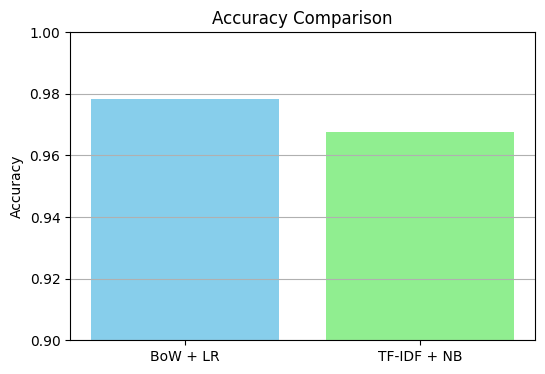

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
plt.bar(['BoW + LR', 'TF-IDF + NB'], [acc_bow, acc_tfidf], color=['skyblue', 'lightgreen'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.grid(axis='y')
plt.show()
